In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as smf
import statsmodels.formula.api as sm

In [3]:
data=pd.read_csv('delivery_time.csv')
data

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [4]:
data = data.rename({'Delivery Time':'Delivery_Time','Sorting Time':'Sorting_Time'}, axis = 1)
data

,Delivery_Time,Sorting_Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [5]:
data

,Delivery_Time,Sorting_Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery_Time  21 non-null     float64
 1   Sorting_Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [7]:
data.describe()

,Delivery_Time,Sorting_Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


<AxesSubplot:xlabel='Sorting_Time', ylabel='Delivery_Time'>

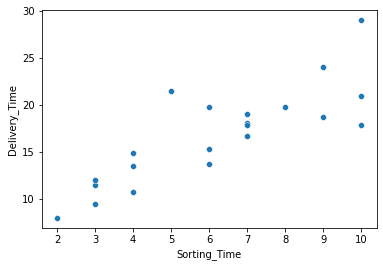

In [8]:
sns.scatterplot(x=data['Sorting_Time'],y=data['Delivery_Time'])

In [9]:
data.corr()

,Delivery_Time,Sorting_Time
Delivery_Time,1.000000,0.825997
Sorting_Time,0.825997,1.000000


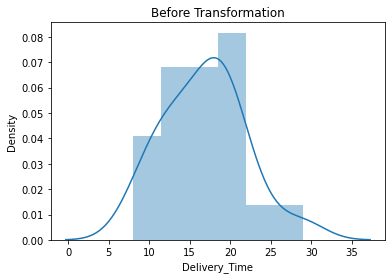

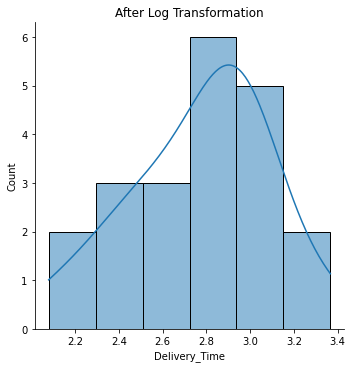

In [10]:
sns.distplot(data['Delivery_Time'], bins = 6, kde = True)
plt.title('Before Transformation')
sns.displot(np.log(data['Delivery_Time']), bins = 6, kde = True)
plt.title('After Log Transformation')
plt.show()

<AxesSubplot:xlabel='Sorting_Time', ylabel='Density'>

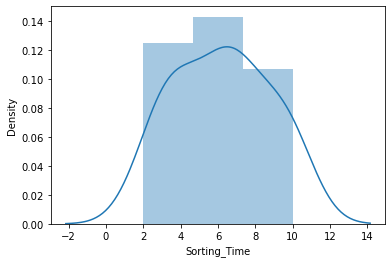

In [11]:
sns.distplot(data['Sorting_Time'])

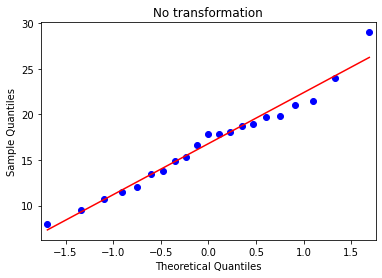

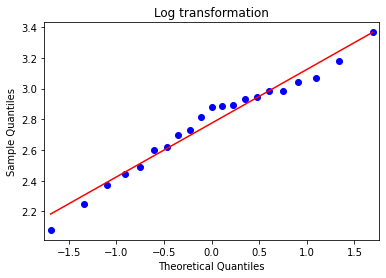

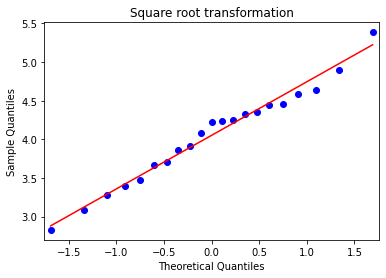

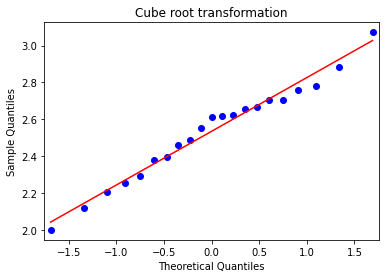

In [12]:
smf.qqplot(data['Delivery_Time'], line = 'r')
plt.title('No transformation')
smf.qqplot(np.log(data['Delivery_Time']), line = 'r')
plt.title('Log transformation')
smf.qqplot(np.sqrt(data['Delivery_Time']), line = 'r')
plt.title('Square root transformation')
smf.qqplot(np.cbrt(data['Delivery_Time']), line = 'r')
plt.title('Cube root transformation')
plt.show()

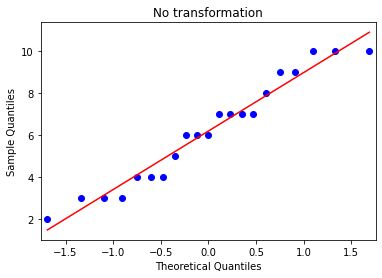

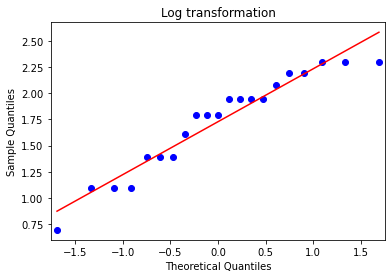

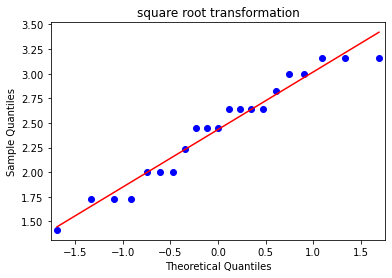

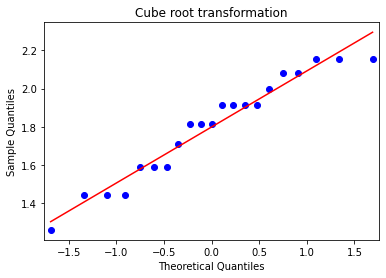

In [13]:
smf.qqplot(data['Sorting_Time'], line = 'r')
plt.title('No transformation')
smf.qqplot(np.log(data['Sorting_Time']), line = 'r')
plt.title('Log transformation')
smf.qqplot(np.sqrt(data['Sorting_Time']), line = 'r')
plt.title('square root transformation')
smf.qqplot(np.cbrt(data['Sorting_Time']), line = 'r')
plt.title('Cube root transformation')
plt.show()

In [14]:
model=sm.ols("Delivery_Time~Sorting_Time",data = data).fit()

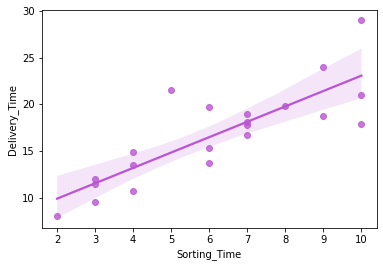

In [15]:
sns.regplot(x='Sorting_Time',y='Delivery_Time',data=data,color='mediumorchid');

In [16]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_Time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Sun, 06 Nov 2022   Prob (F-statistic):           3.98e-06
Time:                        14:01:05   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
Sorting_Time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
predicted = pd.DataFrame()
predicted['Sorting_Time'] = data.Sorting_Time
predicted['Delivery_Time'] = data.Delivery_Time
predicted['Predicted_Delivery_Time'] = pd.DataFrame((model.predict(predicted.Sorting_Time)))
predicted

,Sorting_Time,Delivery_Time,Predicted_Delivery_Time
0,10,21.00,23.072933
1,4,13.50,13.178814
2,6,19.75,16.476853
3,9,24.00,21.423913
4,10,29.00,23.072933
5,6,15.35,16.476853
6,7,19.00,18.125873
7,3,9.50,11.529794
8,10,17.90,23.072933
9,9,18.75,21.423913
